In [9]:
#Package imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cycler
# import seaborn as sns
from scipy.optimize import curve_fit
from math import exp, sqrt
from sklearn.linear_model import LinearRegression
# from lmfit import Parameters, minimize
from statistics import median
plt.style.use('./paper.mplstyle.py')

In [10]:
def resultsPanel_exp(dfExp, dfErr, labels, varyCondition, rep):   
    '''Purpose: Plot selected readout time courses
    
       Input: 
            dfSim: df containing the simulated data
            dfExp: df containing the experimental data
            dfErr: df containing the measurement error associated with the experimental data
            labels: list of lists containing the condition labels to be plotted
            varyCondition: string contraining the label of the condition that is sweeped over in the plot
   
       Output: none
        
       Plots: MODELING OBJECTIVE ' + str(objective) + '.svg' - 
                Plot of readout dynamics associated with the given modeling objective 
    '''
    
    fig = plt.figure(figsize = (12,3.5))
    fig.subplots_adjust(wspace=0.1, hspace=0.1)
    ax1 = plt.subplot(131)   
    ax2 = plt.subplot(132)
    ax3 = plt.subplot(133)

    def grabData(labels):
#         drop_labels_error = [[5.0, 10.0, 0.001, 1, 90], [1.0, 2.5, 0.001, 10.0, 90.0], [20.0, 10.0, 0.001, 1.0, 90.0], [5.0, 0.5, 0.005, 10.0, 90.0], [20.0, 0.5, 0.005, 1.0, 90.0], [1.0, 2.5, 0.001, 1.0, 90.0], [20.0, 0.5, 0.005, 10.0, 90.0]]
        drop_labels_no_triplicate =[[20.0, 10.0, 0.001, 10.0, 90.0], [20.0, 10.0, 0.001, 0.0, 90.0], [5.0, 2.5, 0.001, 0.0, 90.0]]
        drop_labels_error = [[0., 0.]]
    
        count = 0
        
        if rep == 'rep1':
            maxVal = 0.6599948235700113
        elif rep == 'rep2':
            maxVal = 2.94995531724754
        elif rep == 'rep3':
            maxVal = 1.12314566577301 

        exp =  [1,1,1]
        for (columnName, columnData) in dfExp.iteritems():
            label = list(columnData.iloc[0])
            time = np.linspace(0, 240, 61)
            
            if rep == 'rep1':
                if label == labels[0]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        exp[0] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        exp[0] = [i/maxVal for i in t_course]
                elif label == labels[1]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        exp[1] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        exp[1] = [i/maxVal for i in t_course]
                elif label == labels[2]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        exp[2] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        exp[2] = [i/maxVal for i in t_course]
            
            elif rep == 'rep2' or rep == 'rep3':    
                if label == labels[0]:
                    t_course = columnData.iloc[1:]
                    exp[0] = [i/maxVal for i in t_course]
                elif label == labels[1]:
                    t_course = columnData.iloc[1:]
                    exp[1] = [i/maxVal for i in t_course]
                elif label == labels[2]:
                    t_course = columnData.iloc[1:]
                    exp[2] = [i/maxVal for i in t_course]
        
        err =  [1,1,1]
        for (columnName, columnData) in dfErr.iteritems():
            label = list(columnData.iloc[0])
#             time = np.linspace(0, 240, 61)
           
            if rep == 'rep1':
                if label == labels[0]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        err[0] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        err[0] = [i/maxVal for i in t_course]
                elif label == labels[1]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        err[1] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        err[1] = [i/maxVal for i in t_course]
                elif label == labels[2]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        err[2] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        err[2] = [i/maxVal for i in t_course]
                        
            elif rep == 'rep2' or rep == 'rep3':
                if label == labels[0]:
                    t_course = columnData.iloc[1:]
                    err[0] = [i/maxVal for i in t_course]
                elif label == labels[1]:
                    t_course = columnData.iloc[1:]
                    err[1] = [i/maxVal for i in t_course]
                elif label == labels[2]:
                    t_course = columnData.iloc[1:]
                    err[2] = [i/maxVal for i in t_course]

        return exp, err

    if varyCondition == 'T7':
#         varyIndex = 0
        vals = [1.0, 5.0, 20.0]
        colors = ['lightgreen', 'mediumseagreen', 'darkgreen']    
    elif varyCondition == 'RT':
#         varyIndex = 1
        vals = [0.5, 2.5, 10.0]
        colors = ['lightsteelblue', 'royalblue', 'midnightblue']
    elif varyCondition == 'RNase':
#         varyIndex = 2
        vals = [0.001, 0.005, 0.02]
        colors = ['lightcoral', 'red', 'maroon']
        
    time = np.linspace(0, 240, 61)
    
    exp0, err0 = grabData(labels)
    for i in range(0, len(exp0)):
        list_exp = exp0[i]
        list_err = err0[i]
        upper_y = []
        lower_y = []
        for j, val in enumerate(list_exp):
            upper_y.append(val + list_err[j])
            lower_y.append(val - list_err[j])

        ax1.fill_between(time, lower_y, upper_y, alpha = .2, color = colors[i])
        ax1.plot(time, exp0[i],  marker = None, linestyle = 'solid', color = colors[i], label=varyCondition+' '+str(vals[i]))
        ax1.set_xscale('linear')
    
    ax1.set_xlabel('Time (min)')
    ax1.set_ylabel('Normalized exp output')
    ax1.legend()
    ax1.set_title('vRNA = 0fM', fontsize = 10, fontweight = 'bold')
    ax1.set_box_aspect(1)

    
    for i in range(0, len(labels)):
        labels[i][3] = 1
    
    exp1, err1 = grabData(labels)
    for i in range(0, len(exp1)):
        list_exp = exp1[i]
        list_err = err1[i]
        upper_y = []
        lower_y = []
        for j, val in enumerate(list_exp):
            upper_y.append(val + list_err[j])
            lower_y.append(val - list_err[j])

        ax2.fill_between(time, lower_y, upper_y, alpha = .2, color = colors[i])
        ax2.plot(time, exp1[i],  marker = None, linestyle = 'solid', color = colors[i], label=varyCondition+' '+str(vals[i]))
        ax2.set_xscale('linear')
    
    ax2.set_xlabel('Time (min)')
    ax2.set_ylabel('Normalized exp output')
    ax2.legend()
    ax2.set_title('vRNA = 1fM', fontsize = 10, fontweight = 'bold')
    ax2.set_box_aspect(1)

    for i in range(0, len(labels)):
        labels[i][3] = 10
    
    exp10, err10 = grabData(labels)
        
    for i in range(0, len(exp10)):
        list_exp = exp10[i]
        list_err = err10[i]
        upper_y = []
        lower_y = []
        for j, val in enumerate(list_exp):
            upper_y.append(val + list_err[j])
            lower_y.append(val - list_err[j])

        ax3.fill_between(time, lower_y, upper_y, alpha = .2, color = colors[i])
        ax3.plot(time, exp10[i],  marker = None, linestyle = 'solid', color = colors[i], label=varyCondition+' '+str(vals[i]))
        ax3.set_xscale('linear')
    
    ax3.set_xlabel('Time (min)')
    ax3.legend()
    ax3.set_title('vRNA = 10fM', fontsize = 10, fontweight = 'bold')
    ax3.set_box_aspect(1)

    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 1)
    ax3.set_ylim(0, 1)
    fig.suptitle(varyCondition + '_Sweep_Cas13=' + str(labels[-1][-1]) +  ' ' + rep, fontsize = 12, fontweight = 'bold')
#     plt.show()
    plt.savefig(varyCondition + '_Sweep_Cas13=' + str(labels[-1][-1]) + '_' + rep + '.svg', dpi = 600, bbox_inches="tight")

In [11]:
#T7 sweep at low RT (0.5)

def sweeps_exp(
    df_data,
    df_error,
    rep,
    cas,
    RT_sweep_doses,
    T7_sweep_doses,
    RNase_sweep_doses
):
    '''Purpose: Plot selected readout time courses for objectives 4, 5, and 6
       Output: none
       Plots: None
    '''
    def RT_sweep(T7_dose, RNase_dose):
        if T7_dose == 'low':
            T7 = 1.0
        elif T7_dose == 'mid':
            T7 = 5.0
        elif T7_dose == 'high':
            T7 = 20.0

        if RNase_dose == 'low':
            RNase = 0.001
        elif RNase_dose == 'mid':
            RNase = 0.005
        elif RNase_dose == 'high':
            RNase = 0.02


        labels = [[T7, 0.5, RNase, 0, cas], [T7, 2.5, RNase, 0, cas], [T7, 10.0, RNase, 0, cas]]
        varyCondition = 'RT'
        resultsPanel_exp(df_data, df_error, labels, varyCondition, rep) 

    def T7_sweep(RT_dose, RNase_dose):
        if RT_dose == 'low':
            RT = 0.5
        elif RT_dose == 'mid':
            RT = 2.5
        elif RT_dose == 'high':
            RT = 10.0

        if RNase_dose == 'low':
            RNase = 0.001
        elif RNase_dose == 'mid':
            RNase = 0.005
        elif RNase_dose == 'high':
            RNase = 0.02


        labels = [[1.0, RT, RNase, 0, cas], [5.0, RT, RNase, 0, cas], [20.0, RT, RNase, 0, cas]]
        varyCondition = 'T7'
        resultsPanel_exp(df_data, df_error, labels, varyCondition, rep) 

    def RNase_sweep(RT_dose, T7_dose):
        if RT_dose == 'low':
            RT = 0.5
        elif RT_dose == 'mid':
            RT = 2.5
        elif RT_dose == 'high':
            RT = 10.0

        if T7_dose == 'low':
            T7 = 1.0
        elif T7_dose == 'mid':
            T7 = 5.0
        elif T7_dose == 'high':
            T7 = 20.0

        labels = [[T7, RT, 0.001, 0, cas], [T7, RT, 0.005, 0, cas], [T7, RT, 0.02, 0, cas]]
        varyCondition = 'RNase'
        resultsPanel_exp(df_data, df_error, labels, varyCondition, rep)
        
    RT_sweep(RT_sweep_doses[0], RT_sweep_doses[1])
    T7_sweep(T7_sweep_doses[0], T7_sweep_doses[1])
    RNase_sweep(RNase_sweep_doses[0], RNase_sweep_doses[1])


In [12]:
path = '/Users/kdreyer/Desktop/Github/COVID_Dx_GAMES/'
fname_rep1_data = 'PROCESSED_DATA_rep1_fix_EXP.pkl'
fname_rep1_err = 'PROCESSED_DATA_rep1_fix_ERR.pkl'
df_data_rep1 = pd.read_pickle(path + fname_rep1_data)
df_error_rep1 = pd.read_pickle(path + fname_rep1_err)
RT_sweep_doses = ['mid', 'mid']
T7_sweep_doses = ['mid', 'mid']
RNase_sweep_doses = ['mid', 'mid']

# sweeps_exp(
#     df_data_rep1,
#     df_error_rep1,
#     'rep1',
#     90,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

# sweeps_exp(
#     df_data_rep1,
#     df_error_rep1,
#     'rep1',
#     4.5,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

fname_rep2_data = 'PROCESSED_DATA_rep2_EXP.pkl'
fname_rep2_err = 'PROCESSED_DATA_rep2_ERR.pkl'
df_data_rep2 = pd.read_pickle(path + fname_rep2_data)
df_error_rep2 = pd.read_pickle(path + fname_rep2_err)

# sweeps_exp(
#     df_data_rep2,
#     df_error_rep2,
#     'rep2',
#     90,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

# sweeps_exp(
#     df_data_rep2,
#     df_error_rep2,
#     'rep2',
#     4.5,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

fname_rep3_data = 'PROCESSED_DATA_rep3_EXP.pkl'
fname_rep3_err = 'PROCESSED_DATA_rep3_ERR.pkl'
df_data_rep3 = pd.read_pickle(path + fname_rep3_data)
df_error_rep3 = pd.read_pickle(path + fname_rep3_err)

# sweeps_exp(
#     df_data_rep3,
#     df_error_rep3,
#     'rep3',
#     90,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

# sweeps_exp(
#     df_data_rep3,
#     df_error_rep3,
#     'rep3',
#     4.5,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kdreyer/Desktop/Github/COVID_Dx_GAMES/PROCESSED_DATA_rep1_fix_EXP.pkl'

In [15]:
def get_exp_data(path, data_fname, err_fname, max_val, cas):
    df_data = pd.read_pickle(path + data_fname)
    df_error = pd.read_pickle(path + err_fname)

    x = []
    x_l = []
    x_h = []
    exp_data = []
    error = []
    exp_data_l = []
    exp_data_h = []
    error_l = []
    error_h = []
    timecourses = []
    timecourses_err = []
    maxVal = max_val

    for (columnName, columnData) in df_data.iteritems():

        label = list(columnData.iloc[0])
        if 'rep1' in data_fname or data_fname == 'PROCESSED DATA EXP.pkl':
            if label == [20.0, 10.0, 0.001, 10.0, 90.0] or label == [20.0, 10.0, 0.001, 0.0, 90.0] or label == [5.0, 2.5, 0.001, 0.0, 90.0]:
                continue

            else:
                if label[3] != 0.0:
                    x.append(label)
                    timecourse = columnData.iloc[1:]
                    timecourse = [i/maxVal for i in timecourse]
                    timecourses.append(timecourse)
                    exp_data = exp_data + timecourse

                    if label[-1] == 90.0:
                        x_h.append(label)
                        tcourse_h = columnData.iloc[1:]
                        tcourse_h = [i/maxVal for i in tcourse_h]
                        exp_data_h = exp_data_h + tcourse_h

                    elif label[-1] == 4.5:
                        x_l.append(label)
                        tcourse_l = columnData.iloc[1:]
                        tcourse_l = [i/maxVal for i in tcourse_l]
                        exp_data_l = exp_data_l + tcourse_l

        else:
            if label[3] != 0.0:
                x.append(label)
                timecourse = columnData.iloc[1:]
                timecourse = [i/maxVal for i in timecourse]
                timecourses.append(timecourse)
                exp_data = exp_data + timecourse

                if label[-1] == 90.0:
                    x_h.append(label)
                    tcourse_h = columnData.iloc[1:]
                    tcourse_h = [i/maxVal for i in tcourse_h]
                    exp_data_h = exp_data_h + tcourse_h

                elif label[-1] == 4.5:
                    x_l.append(label)
                    tcourse_l = columnData.iloc[1:]
                    tcourse_l = [i/maxVal for i in tcourse_l]
                    exp_data_l = exp_data_l + tcourse_l


    for (columnName, columnData) in df_error.iteritems():

        label = list(columnData.iloc[0])
        if 'rep1' in data_fname or data_fname == 'PROCESSED DATA EXP.pkl':
            if label == [20.0, 10.0, 0.001, 10.0, 90.0] or label == [20.0, 10.0, 0.001, 0.0, 90.0] or label == [5.0, 2.5, 0.001, 0.0, 90.0]:
                continue

            else:
                if label[3] != 0.0:
                    err = columnData.iloc[1:]
                    err = [i/maxVal for i in err]
                    timecourses_err.append(err)
                    error = error + err

                    if label[-1] == 90.0:
                        tcourse_h = columnData.iloc[1:]
                        tcourse_h = [i/maxVal for i in tcourse_h]
                        error_h = error_h + tcourse_h

                    elif label[-1] == 4.5:
                        tcourse_l = columnData.iloc[1:]
                        tcourse_l = [i/maxVal for i in tcourse_l]
                        error_l = error_l + tcourse_l

        else:
            if label[3] != 0.0:
                err = columnData.iloc[1:]
                err = [i/maxVal for i in err]
                timecourses_err.append(err)
                error = error + err

                if label[-1] == 90.0:
                    tcourse_h = columnData.iloc[1:]
                    tcourse_h = [i/maxVal for i in tcourse_h]
                    error_h = error_h + tcourse_h

                elif label[-1] == 4.5:
                    tcourse_l = columnData.iloc[1:]
                    tcourse_l = [i/maxVal for i in tcourse_l]
                    error_l = error_l + tcourse_l

    if cas == 'all':
        return x, exp_data, error
    
    elif cas == 'low':
        return x_l, exp_data_l, error_l
    
    elif cas == 'high':
        return x_h, exp_data_h, error_h

In [38]:
def plot_distributions(exp_data, error, x, rep, cas):
    def chunks(lst, n):
        """Yield successive n-sized chunks from lst."""
        for i in range(0, len(lst), n):
            yield lst[i:i + n]
        
    error_lists = list(chunks(error, 61))
    data_lists = list(chunks(exp_data, 61))
    
    percent_err_lists = []
    percent_err_mean = []
    per_error_means = []
    for i, list_ in enumerate(error_lists):
        data_list = data_lists[i]
        error_list = error_lists[i]
        #print(data_list)
        per_error_list = [j/max(data_list) for j in error_list]
        per_error_means.append(np.mean(per_error_list))
        percent_err_lists.append(per_error_list)
        # if i == 10:
        #     per_error_list = [log10(i) for i in per_error_list]
        #     plt.hist(per_error_list, bins=50, color = 'teal')
    
    index_list = []
    for i, val in enumerate(per_error_means):
        if val > 0.3:
            print(i)
            print(val)
            print('***')
            index_list.append(i)

    for i, val in enumerate(x):
        if i in index_list:
            print(i)
            print(val)
            print('***')
    
    fig = plt.figure()
    plt.hist(error, bins=50, color = 'dimgrey')
    plt.xlabel('standard deviation')
    plt.ylabel('count')
    # plt.savefig(rep + '_error_distribution_cas=' + cas + '.svg')
    
    def flatten(t):
        return [item for sublist in t for item in sublist]
    
    fig = plt.figure()
    proportion_error = flatten(percent_err_lists)
    plt.hist(proportion_error, bins=50, color = 'dimgrey')
    plt.xlabel('proportion_error')
    plt.ylabel('count')
    # plt.savefig(rep + '_proportion_error_distribution_cas=' + cas + '.svg')
    
    fig = plt.figure()
    plt.hist(per_error_means, bins=50, color = 'dimgrey')
    plt.xlabel('mean proportion_error')
    plt.ylabel('count')
    # plt.savefig(rep + '_mean_proportion_error_distribution_cas=' + cas + '.svg')

    fmax_list = []
    for tcourse in data_lists:
        fmax = tcourse[-1]
        fmax_list.append(fmax)

    fig = plt.figure()
    plt.hist(fmax_list, bins=25, color = 'dimgrey')
    plt.xlabel('f_max')
    plt.ylabel('count')
    # plt.savefig(rep + '_fmax_distribution_cas=' + cas + '.svg')

In [39]:
def calcRsq(dataX, dataY):
    '''Given 2 lists, this function calculates the R2'''
    x = np.array(dataX)
    y = np.array(dataY)
  
    x = x.reshape((-1, 1))
    model = LinearRegression()
    model.fit(x,y)
    
    rSq = model.score(x, y)
    yInt = model.intercept_
    m = model.coef_
    xInt = -yInt/m
    
    return rSq

def fitHill(y_exp, runID, i):
    x = list(np.linspace(0, 240, 61)) #time (min)
    
    #Set v max to the final value of the time course
    fmax = y_exp[-1]
   
    #Set v0 to the intiial value of the time course
    f0 = y_exp[0]

    
    #Define a function to calculate the residual between the input simulation value (sim) and the Hill fit (model)
    def residual(p, x, y_exp):
        km = p['km'].value
        #print('km: ' + str(km))
        n = p['n'].value
        #print('n: ' + str(n))
        model = (((fmax - f0) * (x ** n)) / (km ** n + x ** n)) + f0
        #print(model)
        #print('***')
        return (y_exp - model)
    
    #Define parameters to be fit, along with initial guesses
    p = Parameters()
    p.add('km', value=10e-2, min=0, vary = True)
    p.add('n', value=2, min=0, max = 5, vary = True)
    
    #Perform the fit
    out = minimize(residual, p, args=(x, y_exp))
    bestFitParams = out.params.valuesdict()
    bestFitParamsList= bestFitParams.values()
    
    #Define fit parameters
    fit = []
    for value in bestFitParamsList:
        fit.append(value)
    km = fit[0]
    n = fit[1]
    
    #Simulate the Hill fit
    y_Hill = []
    for item in x:
        value = (((fmax - f0) * (item ** n)) / (km ** n + item ** n)) + f0
        y_Hill.append(value)
    
    #Calculate the R2 between the data and the Hill fit
    R_sq = calcRsq(y_exp, y_Hill)
    
    if runID == 'plot' or i == 15:
        figure2 = plt.figure(figsize = (3,3))
        plt.plot(x, y_exp, color = 'black', marker='o', linestyle = 'None', fillstyle = 'none')
        plt.xlabel('Time (min)')
        plt.ylabel('Normalized readout')
        plt.plot(x, y_Hill, color = 'black',  linestyle = 'dashed')
        plt.legend(['Simulation', 'Hill fit'])
        plt.title('R2 = ' + str(np.round(R_sq, 3)))
        # plt.savefig('Figure 3 representative Hill fit.svg', dpi = 600)
    
    return f0, fmax, km, n, R_sq

#Unnpack the data from "exp_data" and "error"
def chunks(lst, n):
        """Yield successive n-sized chunks from lst."""
        for i in range(0, len(lst), n):
            yield lst[i:i + n]
        
def fitHillAllData(data_lists, type_):
    fit_params = []
    i = 0
    for time_course in data_lists:
        f0, fmax, km, n, R_sq = fitHill(time_course, '', i)
        fit_params.append([f0, fmax, km, n, R_sq])
        i += 1

    df = pd.DataFrame()
    f0 = [list_[0] for list_ in fit_params]
    fmax = [list_[1] for list_ in fit_params]
    km = [list_[2] for list_ in fit_params]
    n = [list_[3] for list_ in fit_params]
    R_sq = [list_[4] for list_ in fit_params]

    df['f0'] = f0
    df['fmax'] = fmax
    df['km'] = km
    df['n'] = n
    df['R_sq'] = R_sq
    
    return R_sq, fmax, km


def plot_tradeoff(x, fmax, t_half, rep):
    fig, axes = plt.subplots(ncols=3,nrows=1, sharex=True, sharey=True, figsize = (9,3))
    
    for color_by, ax in zip(['T7', 'RT', 'RNAse'], axes.flat):
        
        if color_by == 'T7':
            vals = [1.0, 5.0, 20.0]
            colors = ['lightgreen', 'mediumseagreen', 'darkgreen']    
            varyIndex = 0
        elif color_by == 'RT':
            vals = [0.5, 2.5, 10.0]
            colors = ['lightsteelblue', 'royalblue', 'midnightblue']
            varyIndex = 1
        elif color_by == 'RNAse':
            vals = [0.001, 0.005, 0.02]
            colors = ['lightcoral', 'red', 'maroon']
            varyIndex = 2
            
        for i, enzyme_condition in enumerate(x):
            if enzyme_condition[varyIndex] == vals[0]:
                color_ = colors[0]
            elif enzyme_condition[varyIndex] == vals[1]:
                color_ = colors[1]
            elif enzyme_condition[varyIndex] == vals[2]:
                color_ = colors[2]     

            if enzyme_condition[3] == 1: #and enzyme_condition[4] == 90:
                ax.plot(t_half[i], fmax[i],  marker = 'o', linestyle = 'None', color = color_)

            if enzyme_condition == [5.0, 2.5, 0.005, 1, 90]:
                ax.plot(t_half[i], fmax[i],  marker = 'o', linestyle = 'None', color = 'dimgrey')
            if enzyme_condition == [5.0, 10.0, 0.02, 1, 90]:
                ax.plot(t_half[i], fmax[i],  marker = 'o', linestyle = 'None', color = 'black')
            
            if color_by == 'RT':
                ax.set_xlabel('t 1/2 (min.)')
            if color_by == 'T7':
                ax.set_ylabel('f max (normalized)')
            ax.set_ylim([0,1])
            ax.set_xlim([60, 120])
        
    plt.savefig(rep + '_exp_performance_metric_tradeoffs.svg')


36
0.45629714147649286
***
36
[5.0, 10.0, 0.02, 10, 90]
***


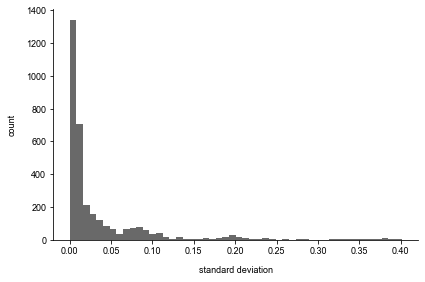

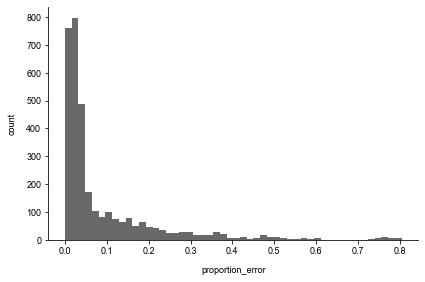

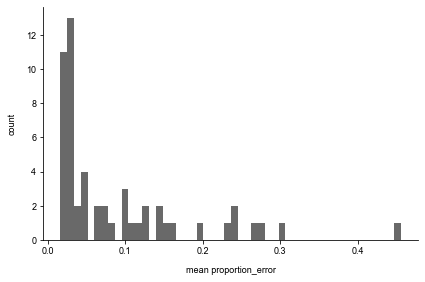

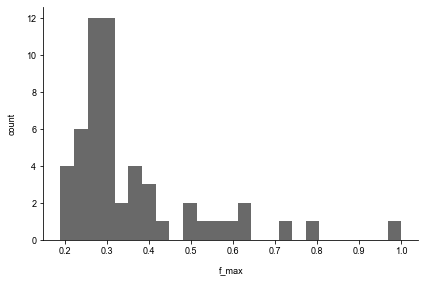

In [41]:
path = '/Users/kdreyer/Documents/Github/COVID_Dx_GAMES/'

#rep 1
fname_rep1_data = 'PROCESSED_DATA_rep1_fix_EXP.pkl'
fname_rep1_err = 'PROCESSED_DATA_rep1_fix_ERR.pkl'
# fname_rep1_data = 'PROCESSED DATA EXP.pkl'
# fname_rep1_err = 'PROCESSED DATA ERR.pkl'
max_rep1 = 0.6599948235700113

# x, exp_data1, exp_error1 = get_exp_data(path, fname_rep1_data, fname_rep1_err, max_rep1, 'all')
# plot_distributions(exp_data1, exp_error1, 'rep1', 'all')

# x_l, exp_data1_l, exp_error1_l = get_exp_data(path, fname_rep1_data, fname_rep1_err, max_rep1, 'low')
# plot_distributions(exp_data1_l, exp_error1_l, 'rep1', 'low')

# x_h, exp_data1_h, exp_error1_h = get_exp_data(path, fname_rep1_data, fname_rep1_err, max_rep1, 'high')
# plot_distributions(exp_data1_h, exp_error1_h, x_h, 'rep1', 'high')

# error_lists = list(chunks(exp_error1_l, 61))
# data_lists = list(chunks(exp_data1_l, 61))
# R_sq_list, fmax_list, t_half_list = fitHillAllData(data_lists, 'exp')
# plot_tradeoff(x_l, fmax_list, t_half_list, 'rep1l')

# #rep 2
fname_rep2_data = 'PROCESSED_DATA_rep2_EXP.pkl'
fname_rep2_err = 'PROCESSED_DATA_rep2_ERR.pkl'
max_rep2 = 2.94995531724754

# x, exp_data2, exp_error2 = get_exp_data(path, fname_rep2_data, fname_rep2_err, max_rep2, 'all')
# plot_distributions(exp_data2, exp_error2, 'rep2', 'all')

# x_l, exp_data2_l, exp_error2_l = get_exp_data(path, fname_rep2_data, fname_rep2_err, max_rep2, 'low')
# plot_distributions(exp_data2_l, exp_error2_l, 'rep2', 'low')

# x_h, exp_data2_h, exp_error2_h = get_exp_data(path, fname_rep2_data, fname_rep2_err, max_rep2, 'high')
# plot_distributions(exp_data2_h, exp_error2_h, x_h, 'rep2', 'high')

# error_lists = list(chunks(exp_error2_h, 61))
# data_lists = list(chunks(exp_data2_h, 61))
# R_sq_list, fmax_list, t_half_list = fitHillAllData(data_lists, 'exp')
# plot_tradeoff(x_h, fmax_list, t_half_list, 'rep2h')

# #rep 3
fname_rep3_data = 'PROCESSED_DATA_rep3_EXP.pkl'
fname_rep3_err = 'PROCESSED_DATA_rep3_ERR.pkl'
max_rep3 = 1.12314566577301

# x, exp_data3, exp_error3 = get_exp_data(path, fname_rep3_data, fname_rep3_err, max_rep3, 'all')
# plot_distributions(exp_data3, exp_error3, 'rep3', 'all')

# x_l, exp_data3_l, exp_error3_l = get_exp_data(path, fname_rep3_data, fname_rep3_err, max_rep3, 'low')
# plot_distributions(exp_data3_l, exp_error3_l, 'rep3', 'low')

x_h, exp_data3_h, exp_error3_h = get_exp_data(path, fname_rep3_data, fname_rep3_err, max_rep3, 'high')
plot_distributions(exp_data3_h, exp_error3_h, x_h, 'rep3', 'high')

# error_lists = list(chunks(exp_error3_h, 61))
# data_lists = list(chunks(exp_data3_h, 61))
# R_sq_list, fmax_list, t_half_list = fitHillAllData(data_lists, 'exp')
# plot_tradeoff(x_h, fmax_list, t_half_list, 'rep3h')